In [2]:
from typing import TypedDict, List
from langgraph.graph import StateGraph, START, END

In [3]:
class AgentState(TypedDict):
    number1: int
    operation: str
    number2: int
    finalNumber: int

In [5]:
def adder(state: AgentState) -> AgentState:
    """This node adds the 2 numbers"""
    state['finalNumber'] = state['number1'] + state['number2']
    return state

def substract(state: AgentState) -> AgentState:
    """This node substracts the 2 numbers"""
    state['finalNumber'] = state['number1'] - state['number2']
    return state

def decide_next_node(state: AgentState) -> AgentState:
    """This node will select the next node of graph"""
    if state['operation'] == "+":
        return "addition_operation"
    elif state['operation'] == "-":
        return "substraction_operation"

In [6]:
graph = StateGraph(AgentState)
graph.add_node("add_node", adder)
graph.add_node("substract_node", substract)
graph.add_node("router", lambda state: state) # passthrough function

graph.add_edge(START, "router")
graph.add_conditional_edges(
    "router",
    decide_next_node,
    {
        # Edge: Node
        "addition_operation": "add_node",
        "substraction_operation": "substract_node",
    }
)

graph.add_edge("add_node", END)
graph.add_edge("substract_node", END)
app = graph.compile()




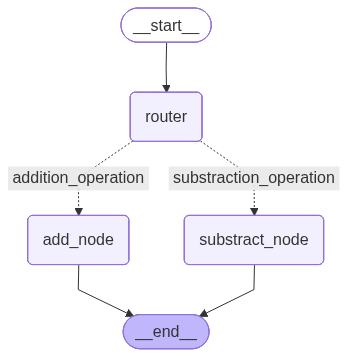

In [7]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [8]:
initial_state_1 = AgentState(number1=10, operation="-", number2=5)
print(app.invoke(initial_state_1))

{'number1': 10, 'operation': '-', 'number2': 5, 'finalNumber': 5}
